# Forward Error Correction First Principals

Import a parity check matrix for DOCSIS 3.1 initial ranging which is stored in a csv file.

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as matches
from matplotlib.colors import ListedColormap
np.set_printoptions(threshold=sys.maxsize)

with open('./data/docsis_init_ranging_parity.csv') as f:
    H = np.loadtxt(f, delimiter=",")
    
n = len(H[0]) # block size (parity check columns)
k = len(H) # information bits (parity check rows)
p = 16 # sub-matrix size

Plot the parity check matrix.     
*Will hide some of this code with a helper function*

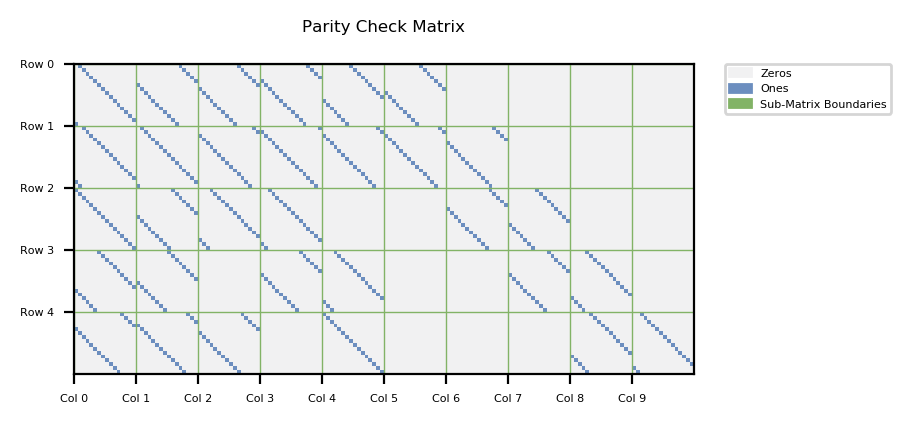

In [5]:
strathclyde = '#6C8EBF'
off_green = '#82B366'
not_white = '#F1F1F2'
old_computer = '#FDFCE8'
cmap = ListedColormap([not_white, strathclyde])

plt.matshow(H, cmap=cmap)

zeros_patch = matches.Patch(color=not_white, label='Zeros')
ones_patch = matches.Patch(color=strathclyde, label='Ones')
sm_patch = matches.Patch(color=off_green, label='Sub-Matrix Boundaries')
plt.legend(handles=[zeros_patch, ones_patch, sm_patch], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., prop={'size': 4})
plt.rcParams['figure.figsize'] = [1, 1]
plt.rcParams['figure.dpi'] = 200
plt.grid(color=off_green, linewidth=0.5)
plt.title('Parity Check Matrix',fontsize=6)

x_pos = np.arange(n)[::p]-0.5
xlabels = []
for i in range(int(n/p)):
    label = 'Col %d' % i
    xlabels.append(label)
plt.xticks(x_pos,xlabels,fontsize=4)
plt.tick_params(axis='x',bottom=True,top=False, labelbottom=True, labeltop=False)

y_pos = np.arange(k)[::p]-0.5
ylabels = []
for i in range(int(k/p)):
    label = 'Row %d' % i
    ylabels.append(label)
plt.yticks(y_pos,ylabels,fontsize=4)

plt.show()

Block size (n) is given by the number of columns in the full parity check matrix (10 sub-matrix columns * size of sub matrix = 10 * 16 = 160).    
Information bits is given by the number of rows in the full parity check matrix (5 sub-matrix rows * size of sub matrix = 5 * 16 = 80).    
p is the sub-matrix size which is 16.    
The sub-matrix array is made by taking all the sub-matrices with an identity matrix and providing the row and column numbers along with the number of right shifts the identity matrix has undergone.

In [6]:
print('docsis_init_ranging:')
print('  n:', n)
print('  k:', k)
print('  p:', p)
print('  sm_array:')
for row_i in range(k)[::p]:
    for col_i in range(n)[::p]:
        sm_row = row_i/p
        sm_col = col_i/p
        sm_row_0 = H[row_i,col_i:col_i+p]
        shift = np.where(sm_row_0==1)
        if shift[0].size > 0: # If there is a sub matrix
            print('  - {row: %d, col: %d, shift: %d}' % (sm_row, sm_col, shift[0][0]))

docsis_init_ranging:
  n: 160
  k: 80
  p: 16
  sm_array:
  - {row: 0, col: 0, shift: 1}
  - {row: 0, col: 1, shift: 11}
  - {row: 0, col: 2, shift: 10}
  - {row: 0, col: 3, shift: 12}
  - {row: 0, col: 4, shift: 7}
  - {row: 0, col: 5, shift: 9}
  - {row: 1, col: 0, shift: 2}
  - {row: 1, col: 1, shift: 1}
  - {row: 1, col: 2, shift: 14}
  - {row: 1, col: 3, shift: 15}
  - {row: 1, col: 4, shift: 14}
  - {row: 1, col: 5, shift: 14}
  - {row: 1, col: 6, shift: 12}
  - {row: 2, col: 0, shift: 0}
  - {row: 2, col: 1, shift: 9}
  - {row: 2, col: 2, shift: 3}
  - {row: 2, col: 3, shift: 2}
  - {row: 2, col: 6, shift: 11}
  - {row: 2, col: 7, shift: 7}
  - {row: 3, col: 0, shift: 6}
  - {row: 3, col: 1, shift: 8}
  - {row: 3, col: 3, shift: 10}
  - {row: 3, col: 4, shift: 3}
  - {row: 3, col: 7, shift: 10}
  - {row: 3, col: 8, shift: 4}
  - {row: 4, col: 0, shift: 12}
  - {row: 4, col: 1, shift: 13}
  - {row: 4, col: 2, shift: 11}
  - {row: 4, col: 4, shift: 0}
  - {row: 4, col: 8, shift: 5